Do students in INDIA and CHINA prefer to learn programming languages, which are mostly used by professional developers in USA ? 


### Business Understanding : 

    USA is always considered as the  land of opportunities, every year lakhs of students from around the world, come to USA  to pursue their dreams especially from INDIA and CHINA which are the most populated countries in the world. 
 
    In current analysis, we will use stack overflow 2019 survey results on annual developers to infer, if the students in     INDIA and CHINA prefer to learn the programming languages that are most used by professional developers in USA to get better opportunities. 





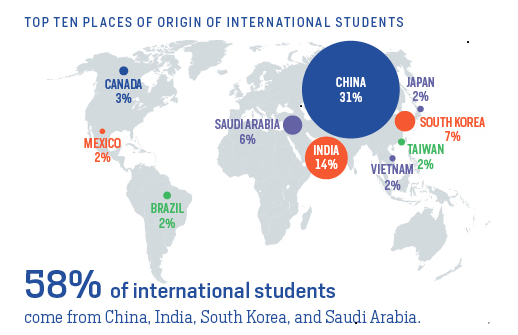

In [1]:
from IPython.display import Image
Image(filename="IIE-open-doors.png", width = 500, height=350)


### Data Understanding

    Intro:Every year stack overflow conducts a survey to examine all the aspects of the developers experience from career           satisfaction to education. In current analysis 2019 Annual developer’s survey data is being used.
    Source Link : https://drive.google.com/open?id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV
    Data description:
    The enclosed data set is the full, cleaned results of the 2019 Stack Overflow Developer Survey. Free response submissions       and personally identifying information have been removed from the results to protect the privacy of respondents. 
    There are three files besides this README:
      1. Survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
      2. Survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
      3. So_survey_2019.pdf - PDF file of survey instrument.
    The survey was fielded from January 23 to February 14, 2019. The median time spent on the Survey for qualified responses was 23.3 minutes.
         

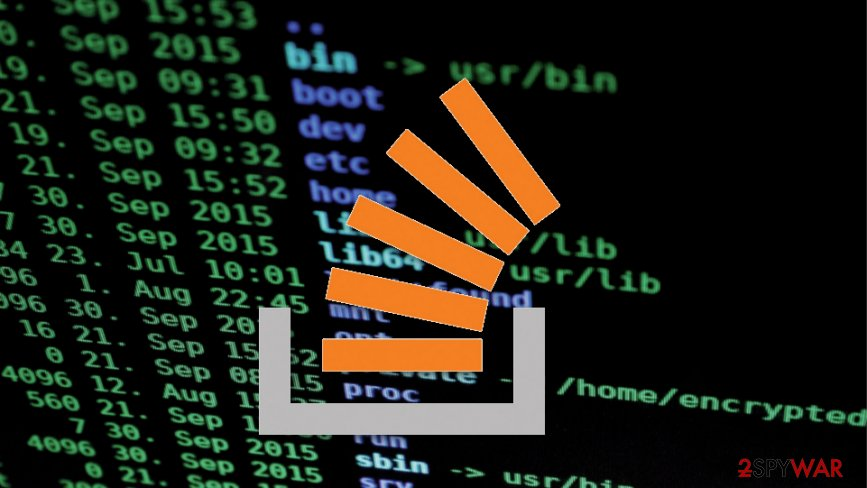

In [2]:
from IPython.display import Image
Image(filename="stack-overflow-claims-to-be-hacked_en.jpg", width = 100, height= 75)

In [3]:
#Required Python Packages 
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
#define plot style 
sns.set(style="darkgrid")



#### Data Preperation

In [4]:
#create a data frame for Survey Data
df_main = pd.read_csv('./survey_results_public_2019.csv')
# Create a Data frame for Schema i.e. columns description
schema_main = pd.read_csv('./survey_results_schema.csv')
#check data 
df_main.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [5]:
#Function to subset main data frame as required
def  df_filter(data_frame,req_col_dict) : 
    """
    Subsets the main data frame containg survey results
    Parameters:
    data_frame - data frame
    req_col_dict - dictionary, where keys are column names and values are list of filters required to apply for the column
    Returns:
    dataframe: a converted dataframe with required columns and filteres applied to each column
    """
    
    df      = pd.DataFrame(data_frame, columns = req_col_dict.keys())
    df      = df.dropna()
    for col in  req_col_dict.keys(): 
        for filter in req_col_dict[col] : 
            df_temp = df[df[col].str.contains(filter,na = False)]
            df      = df_temp
        ###
    ###
    return(df)
####

### Data Analysis and Results Evaluation   
    

### Categorical and Missing Data
No categorical variables have to be handeled for the current analysis, since we required only the frequency of each programming language and percentage of professionals/students prefering it.
In order to avoid the complexity in data analysis, rows with missing values within the subset of data i.e. reuired columns are dropped out.

#### Question 1 : What are the most used programming languages by professional developers in USA.
To answer the above question , we need to extract the following columns :
    #Column_name             filter
    'country'                "United States"
    'MainBranch'             "I am a developer by profession"
    'LanguageWorkedWith'      No filter


In [6]:
#dictionary of required columns and corresponding filters
req_filters_dict     = {'Country' : ["United States"], 'MainBranch' : ["I am a developer by profession"], 'LanguageWorkedWith' : [] }
df_main_subset_q1    = ( df_filter(df_main ,req_filters_dict) ) .dropna()

In [7]:
#dictionary of required columns and corresponding filters
req_filters_dict     = {'Country' : ["United States"], 'MainBranch' : ["I am a developer by profession"], 'LanguageWorkedWith' : [] }
df_main_subset_q1    = df_filter(df_main ,req_filters_dict)
#Calculate the frequency of each progarmming langaue
lanugaes_freq_dict   = {}
for line in df_main_subset_q1["LanguageWorkedWith"] : 
    for lang in line.split(";") : 
        try : 
            lanugaes_freq_dict[lang]+=1
        except KeyError: 
            lanugaes_freq_dict[lang] = 1
    ####
####
##Note : Total number of professionals is based on filtered row's, independent for USA professional programmers
total_freq = sum(lanugaes_freq_dict.values())
#Calculate the percentage  of each progarmming langaue
lanugaes_per_dict = {}
for lan,freq in lanugaes_freq_dict.items(): 
     lanugaes_per_dict[lan] = "%.2f"%( (float(lanugaes_freq_dict[lan]) / total_freq)*100)
####


In [8]:
#prepare data for plotting 
plot_df_q1  =   pd.DataFrame( list(lanugaes_per_dict.items()) , columns=['Programming Language','Percentage']) 
plot_df_q1['Percentage'] = pd.to_numeric(plot_df_q1['Percentage'])

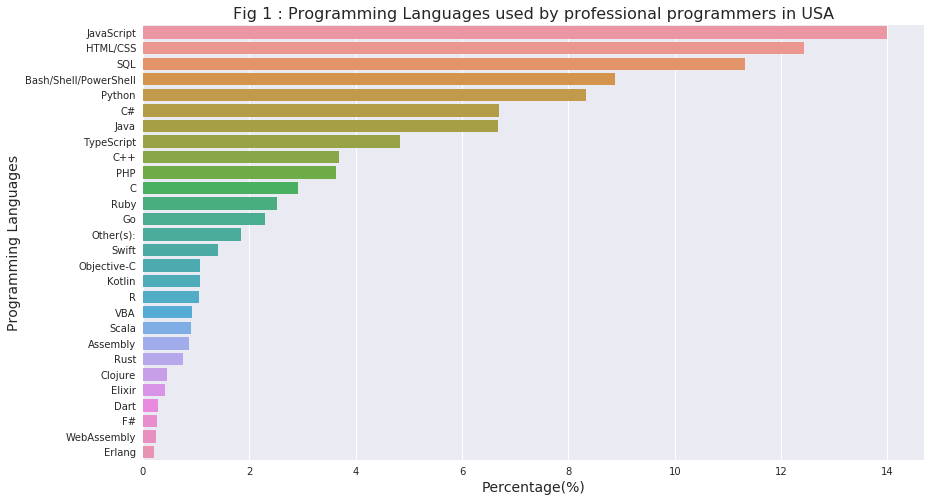

In [9]:
#FIGURE 1 : barplot  
#X-axis : % of programming languages used by professional programmers
#y-axis : Programming language
#The length of the bar plot indicates the percentage of professionals using the particular programming language.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            data = plot_df_q1.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage(%)", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Fig 1 : Programming Languages used by professional programmers in USA', size = 16)
plt.show()

In [10]:
#Table 1 : Table showing the  descending order of Programming Languanges most used by professionals in USA.
plot_df_q1.sort_values(by='Percentage', ascending=False)


,Programming Language,Percentage
7,JavaScript,13.99
6,HTML/CSS,12.43
4,SQL,11.32
5,Bash/Shell/PowerShell,8.87
3,Python,8.33
2,C#,6.70
14,Java,6.68
9,TypeScript,4.84
1,C++,3.69
8,PHP,3.63


    Inference from Figure 1 and Table 1 : 
    > 24 different programming languages are used by professional programmers in USA
    > Java Script, HTML/CSS, SQL , shell scripting , C# , Python and TypeScript  programming languages are used by atleast 5 - 15% of the professionals according to the 2019 Survey.
    > Suprisingly , R which is considered as most used statistical programming language is used only by ~1% of the   professionals

    Now, Let us check if the trend is similar among full time students in India and China.


#### Question 2 : Programming languages preferred by students, who want to learn programming in INDIA and CHINA.
To answer the above question , we need to extract the following columns :
    #Column_name             filter
    'country'                "India" , "China"
    'Student'                 "Yes,full-time"
    'LanguageWorkedWith'      No filter

    2a. analysing trend of programming languages desired to learn by students in India.

In [11]:
#dictionary of required columns and corresponding filters
req_filters_dict     = {'Country' : ["India"], 'Student' : ["Yes, full-time"], 'LanguageWorkedWith' : [] }
df_main_subset_q2    = df_filter(df_main ,req_filters_dict)

#Calculate the frequency of each progarmming langaue
lanugaes_freq_dict   = {}
for line in df_main_subset_q2["LanguageWorkedWith"] : 
    for lang in line.split(";") : 
        try : 
            lanugaes_freq_dict[lang]+=1
        except KeyError: 
            lanugaes_freq_dict[lang] = 1
    ####
####
#Note : Total number of students is based on filtered row's, independent for Indian Students
total_freq = sum(lanugaes_freq_dict.values())
#Calculate the percentage  of each progarmming langaue
lanugaes_per_dict = {}
for lan,freq in lanugaes_freq_dict.items(): 
     lanugaes_per_dict[lan] = "%.2f"%( (float(lanugaes_freq_dict[lan]) / total_freq)*100)
####

In [12]:
#Prepare data for Plotting
plot_df_q2a  =   pd.DataFrame( list(lanugaes_per_dict.items()) , columns=['Programming Language','Percentage']) 
plot_df_q2a ['Percentage'] = pd.to_numeric(plot_df_q2a['Percentage'])

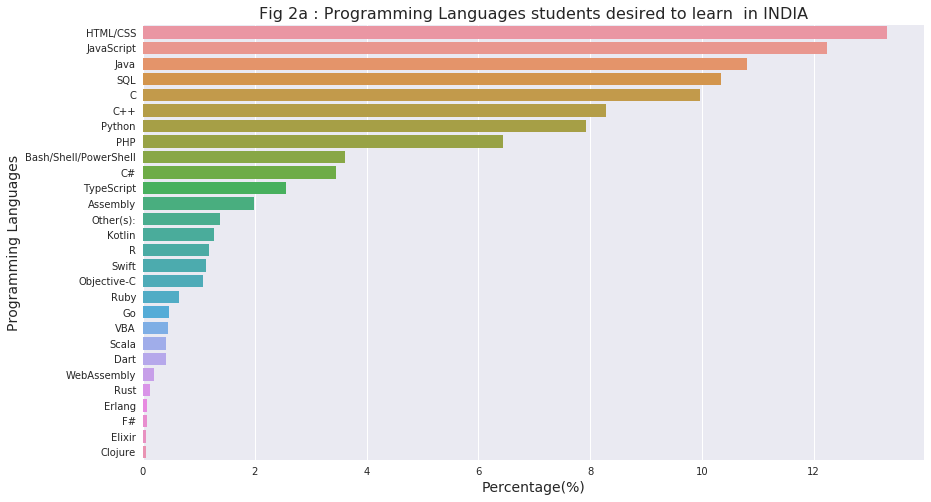

In [13]:
#FIGURE 2a : Barplot 
#X-axis : Percentage of students desired to learn a programming language in India
#Y-axis : Programming languages 
#Length of the barplot indicates the percentage of students want to learn a particular programming language,
#as per 2019 survey results.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            data = plot_df_q2a.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage(%)", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Fig 2a : Programming Languages students desired to learn  in INDIA', size = 16)
plt.show()

In [14]:
#Table 2a : Programming languanges listed in descending order of most desired to learn
plot_df_q2a.sort_values(by='Percentage', ascending=False)

,Programming Language,Percentage
4,HTML/CSS,13.31
6,JavaScript,12.24
5,Java,10.80
8,SQL,10.35
2,C,9.97
3,C++,8.29
10,Python,7.92
7,PHP,6.45
1,Bash/Shell/PowerShell,3.62
11,C#,3.46


    Inference from Figure 2a  and Table 2a : 
      HTML/CSS,Java script, Java,SQL,C, C++ , Python and PHP  are the programming lauguages, atleast 5% of the full time students in India are intrested to learn to code in.
    manual observation indicates that the programming languages that students in India want to learn  and the programming langaguages most used by professionals in USA are similar.
    In furter analysis, let us do a pearson correlation ( assuming data is normalized ), to see how similar the programming languages students in India want to learn and that used by professionals in USA.


    2b. analysing trend of programming languages desired to learn by students in china.

In [15]:
#dictionary of required columns and corresponding filters
req_filters_dict     = {'Country' : ["China"], 'Student' : ["Yes, full-time"], 'LanguageWorkedWith' : [] }
df_main_subset_q2_b    = df_filter(df_main ,req_filters_dict)

#Calculate the frequency of each progarmming langaue
lanugaes_freq_dict   = {}
for line in df_main_subset_q2_b["LanguageWorkedWith"] : 
    for lang in line.split(";") : 
        try : 
            lanugaes_freq_dict[lang]+=1
        except KeyError: 
            lanugaes_freq_dict[lang] = 1
    ####
####
#Note : Total number of students is based on filtered row's, independent for chinese students
total_freq = sum(lanugaes_freq_dict.values())

#Calculate the percentage  of each progarmming langaue
lanugaes_per_dict = {}
for lan,freq in lanugaes_freq_dict.items(): 
     lanugaes_per_dict[lan] = "%.2f"%( (float(lanugaes_freq_dict[lan]) / total_freq)*100)
####

In [16]:
#Prep data for plotting
plot_df_q2b  =   pd.DataFrame( list(lanugaes_per_dict.items()) , columns=['Programming Language','Percentage']) 
plot_df_q2b['Percentage'] = pd.to_numeric(plot_df_q2b['Percentage'])


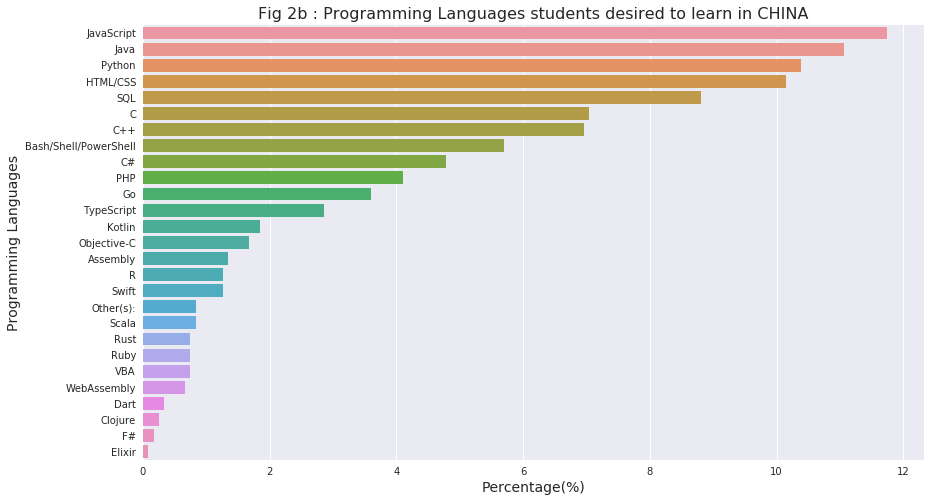

In [17]:
#FIGURE 2b : Barplot 
#X-axis : Percentage of students desired to learn a programming language in China
#Y-axis : Programming languages 
#Length of the barplot indicates the percentage of students want to learn a particular programming language,
#as per 2019 survey results.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            data = plot_df_q2b.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage(%)", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Fig 2b : Programming Languages students desired to learn in CHINA', size = 16)
plt.show()

In [18]:
##Table 2b : Programming languanges listed in descending order of most desired to learn by students in China
plot_df_q2b.sort_values(by='Percentage', ascending=False)

,Programming Language,Percentage
9,JavaScript,11.74
8,Java,11.06
2,Python,10.39
7,HTML/CSS,10.14
3,SQL,8.80
5,C,7.04
6,C++,6.96
0,Bash/Shell/PowerShell,5.70
4,C#,4.78
12,PHP,4.11


    Inference from Figure 2a  and Table 2a : 
    > Javascript,Java,Python and HTML/CSS are top programming languages, 10% of the full time chinese students are learning to code in.
    > While, C# which is most used by USA programmers and desired to learn by Indian students, only 5% of chinese students desire to learn.
    >  As seen in 2a plot, R is not mostly desired to learn by chinese students too, anyways its not most used language by USA professionals.
    
    Now let us see how similar are the programming languages chinese students want to learn and the programming languages used by USA professionals are.
    

#### Question 3 :  Correlation between programming languages  used by programmers  in USA and most learned by students in India and China

In [19]:
#prep data for claculating correlation
plot_df_combined_temp  = pd.merge(plot_df_q1,plot_df_q2a, on=['Programming Language'])
plot_df_combined       =  pd.merge(plot_df_combined_temp,plot_df_q2b, on=['Programming Language'])
plot_df_combined.columns = ['Programming Language' ,'USA_professionals(%)','INDIA_students(%)','China_students(%)']

In [20]:
#Check combined data for correlation 
plot_df_combined

,Programming Language,USA_professionals(%),INDIA_students(%),China_students(%)
0,C,2.92,9.97,7.04
1,C++,3.69,8.29,6.96
2,C#,6.70,3.46,4.78
3,Python,8.33,7.92,10.39
4,SQL,11.32,10.35,8.80
5,Bash/Shell/PowerShell,8.87,3.62,5.70
6,HTML/CSS,12.43,13.31,10.14
7,JavaScript,13.99,12.24,11.74
8,PHP,3.63,6.45,4.11
9,TypeScript,4.84,2.56,2.85


In [21]:
#correlation 
df_corr = plot_df_combined.corr(method="pearson")
df_corr

,USA_professionals(%),INDIA_students(%),China_students(%)
USA_professionals(%),1.000000,0.836573,0.886966
INDIA_students(%),0.836573,1.000000,0.947757
China_students(%),0.886966,0.947757,1.000000


Text(0.5,1,'Fig 3:  Correlation between programming languages  used by programmers  in USA \n and most learned by students in India and China')

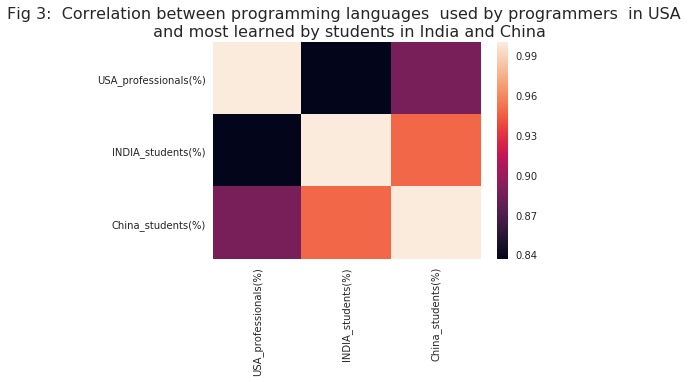

In [22]:
sns.heatmap(df_corr)
plt.title('Fig 3:  Correlation between programming languages  used by programmers  in USA \n and most learned by students in India and China', size = 16)

     Conclusion :
         > The trend of most used programming languages by USA professionals is 85% similar to the most learned programming laguages by students in India. While, is 90% similar to the most learned programming languages by students in China.
         > Programming languages most learned by students in India and China are 95% similar.
